In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('../learnMSA')
from learnMSA import msa_hmm
import seaborn as sns
import os

In [2]:
def check_fam(family, 
                 dataset="homfam", 
                 bins=100,
                 q=0.75):
    fasta_file = msa_hmm.fasta.Fasta("data/"+dataset+"/train/"+family+".fasta")
    ref_fasta_file = msa_hmm.fasta.Fasta("data/"+dataset+"/refs/"+family+".ref")
    x = fasta_file.seq_lens
    print(np.amax(fasta_file.seq_lens))
    plt.hist(x, density=False, bins=bins);  
    plt.xlabel("Seq. length")
    plt.ylabel("Number of seq.")
    median, q25, q75= np.percentile(x, 50), np.percentile(x, 25), np.percentile(x, 75)
    plt.axvline(x = median, color = 'r', label = "median")
    plt.axvline(x = q25, color = 'r', label = "q25")
    plt.axvline(x = q75, color = 'r', label = "q75")
    for sid, length in zip(ref_fasta_file.seq_ids, ref_fasta_file.seq_lens):
        plt.axvline(x = length, color = 'g', label = sid)

In [3]:
def plot_sequence_length_distribution(fasta_filename, 
                                     ax,
                                      ref_filename=None,
                                     bins=100,
                                     q=0.75,
                                     legend=True,
                                     ax_labels=True):
    fasta_file = msa_hmm.fasta.Fasta(fasta_filename)
    x = fasta_file.seq_lens
    sns.histplot(x, bins=bins, ax=ax)
    #plt.hist(x, density=False, bins=bins);  
    if ax_labels:
        ax.set_xlabel("Seq. length")
        ax.set_ylabel("Number of seq.")
    else:
        ax.set_xlabel("")
        ax.set_ylabel("")
    if ref_filename is not None:
        ref_file = msa_hmm.fasta.Fasta(ref_filename)
        for i,length in enumerate(ref_file.seq_lens):
            ax.axvline(x = length, c='r', label = "ref" if i == 0 else None)
    median, q25, q75= np.percentile(x, 50), np.percentile(x, 25), np.percentile(x, 75)
    ax.axvline(x = q25, c='k', ls='--', label = "q25")
    ax.axvline(x = median, c='orange', ls='-', label = "median")
    ax.axvline(x = q75, c='g', ls='--', label = "q75")
    if legend:
        ax.legend(loc='upper right')
    ax.title.set_text(".".join(os.path.basename(fasta_filename).split(".")[:-1]))

In [96]:
def plot_all(dataset_path, num_rows):
    files = [f for f in os.listdir(dataset_path+"/train/") if f.endswith(".fasta")]
    num = len(files)
    num_cols = int(np.ceil(num / num_rows))
    fig, axes = plt.subplots(num_rows, num_cols, constrained_layout = True)
    fig.set_size_inches(24, 14)
    flat_axes = [a for ax in axes for a in ax]
    for i, (file, ax) in enumerate(zip(files, flat_axes)):
        family = ".".join(file.split(".")[:-1])
        plot_sequence_length_distribution(dataset_path+"/train/"+file, ax, dataset_path+f"/refs/{family}.ref", bins=10, legend=i==0, ax_labels=i==num_cols*(num_rows-1))

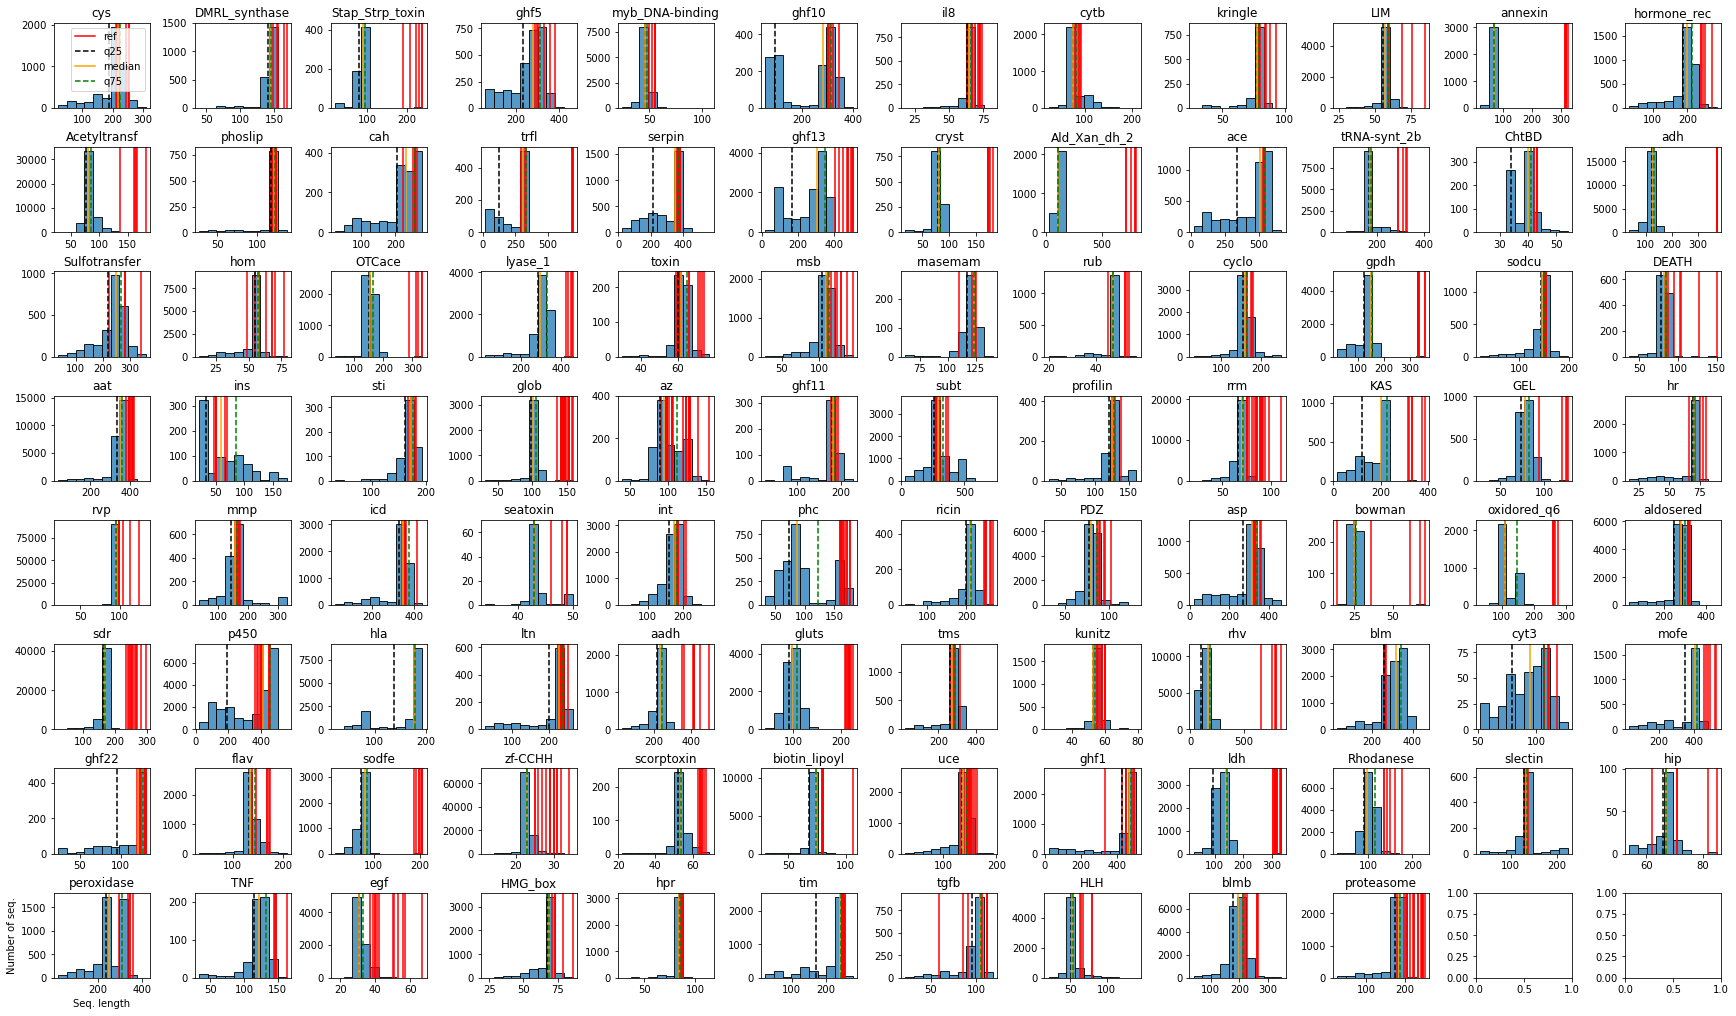

In [97]:
plot_all("data/homfam", 8)

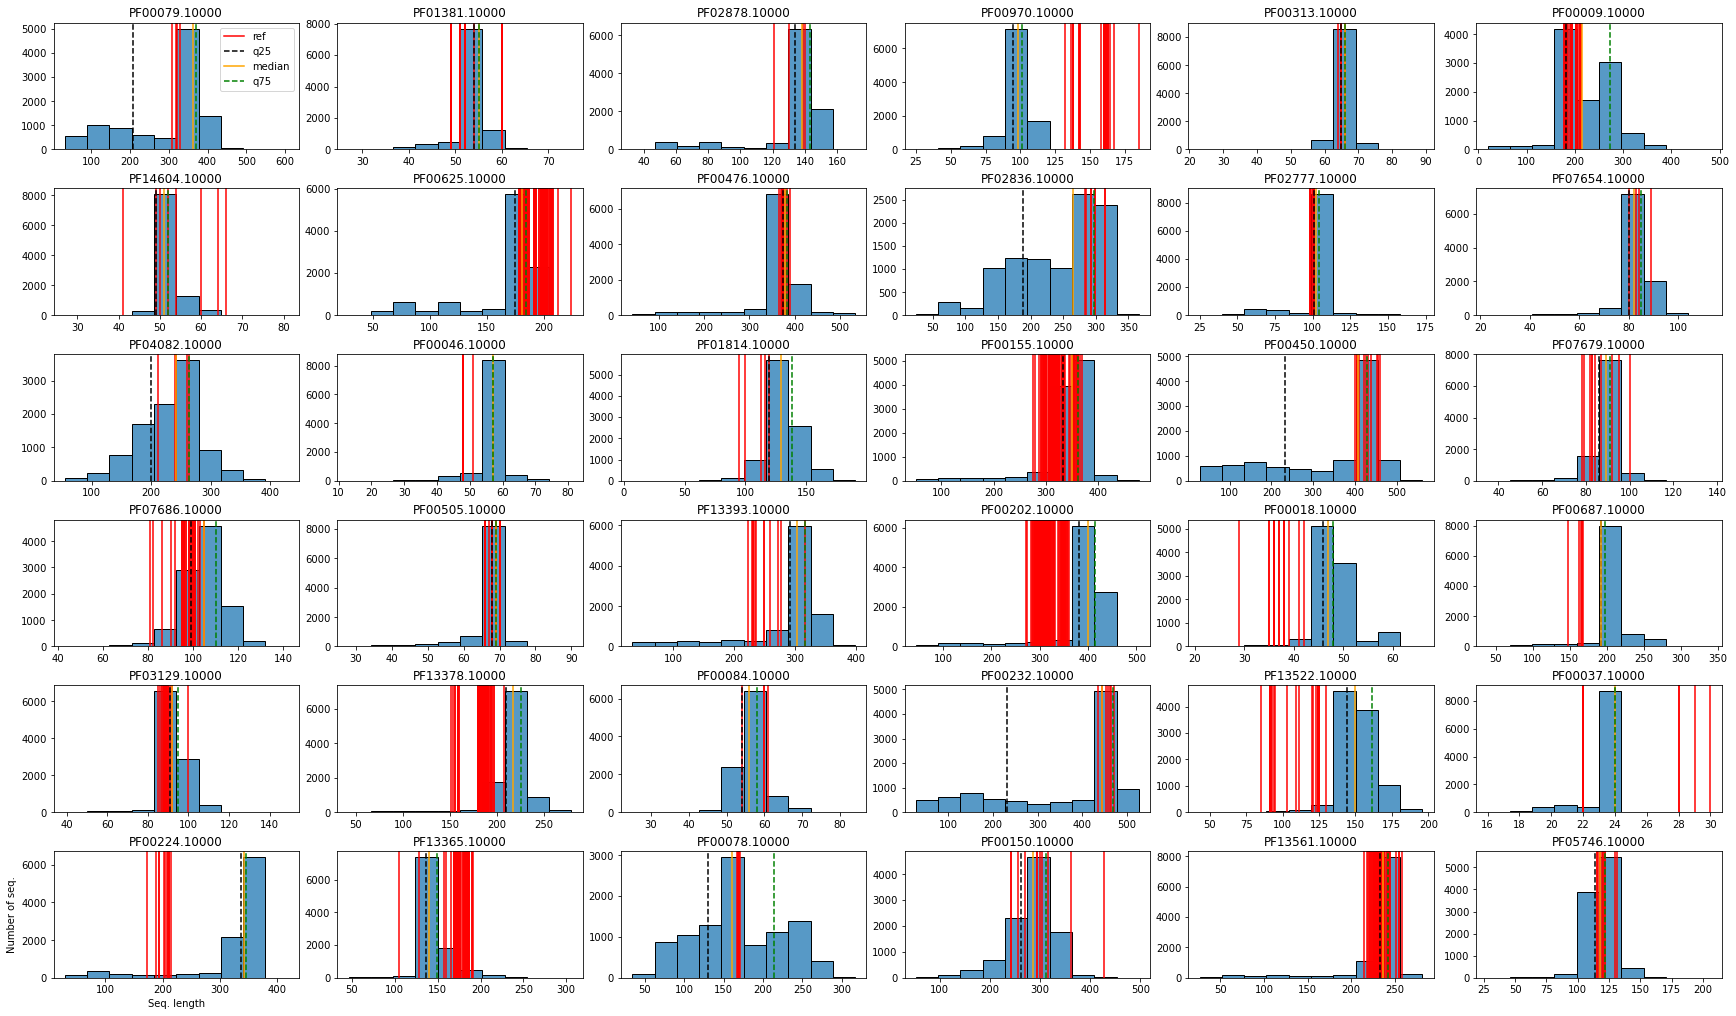

In [98]:
plot_all("data/balifam10000", 6)